# Linear Regression Model for Bike Sharing Demand Prediction

### Problem Statement

- An US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

### Goal
- Model the demand for shared bikes with the available independent variables which can be used by the management to understand how demand varies. This asseememnt will help in manipulating the business strategy to meet the demand levels and meet the customer's expectations.

### Data
The available dataset contains the daily count of rental bikes between the years 2018 and 2019 in the bike share system with the corresponding weather and seasonal information. [Data dictionary](data_dictionary.txt) 

In this notebook, we'll build a linear regression model to predict `Demand` using appropriate predictor variables.

<a id='top'></a>
### Steps:
- [Reading and Understanding the Data](#reading_and_understanding_data)
- [Data Cleaning & Preparation](#data_cleaning)
- [Exploratory Data Analysis](#EDA)
- [Data Encoding](#data_encoding)
- [Train-Test split](#Train-Test)
- [Rescaling features](#scaling)
- [Modelling & Feature Selection - Automated Recursive Feature Elimination (RFE)](#modelling1)
- [Modelling & Feature Selection - Manual Feature Eliminiation](#modelling2)
- [Model Evaluation](#model_eval)
- [Summary](#summary)

### Import Libraries

In [1]:
# Data transformation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn and statsmodel libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

<a id='reading_and_understanding_data'></a>
# 1. Reading and Understanding the Data
[Data dictionary](data_dictionary.txt) 

<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

### 1.1. Load Data to dataframe

In [2]:
bike_df = pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.2. Data Inspection

In [3]:
bike_df.shape

(730, 16)

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<a id='data_cleaning'></a>
# 2. Data Cleaning & Preparation

<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

#### 2.1. Checking Null values
- There are no NULL values in the dataset, hence it is clean.

In [6]:
bike_df.isnull().sum()*100/bike_df.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### 2.2. Derived Metrics
- __dteday__ - can be transformed to days_in_business (number of days since 01/01/2018 assuming this as the date when the business was started).

In [7]:
reference_date = pd.to_datetime('01-01-2018', format='%d-%m-%Y')
bike_df['days_in_business'] = (pd.to_datetime(bike_df['dteday'],format= '%d-%m-%Y') - reference_date).dt.days

#### 2.3. Drop columns that are not required and derive new columns
- __instant__ is a row identifier, no statistical significance
- __casual__ and __registered__ columns can be dropped since we have cnt column which is the sum of these two and cnt will serve as our target variable.
- __dteday__ month, year, weekday, holiday info are additional available, so __dteday__ can be dropped

In [8]:
bike_df.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_in_business
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [9]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_in_business
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


#### 2.4. Outlier Analysis on Continuous variables
- There are no significant outliers.
- We can consider removing the single outlier from windspeed, but we will keep it for this sample.

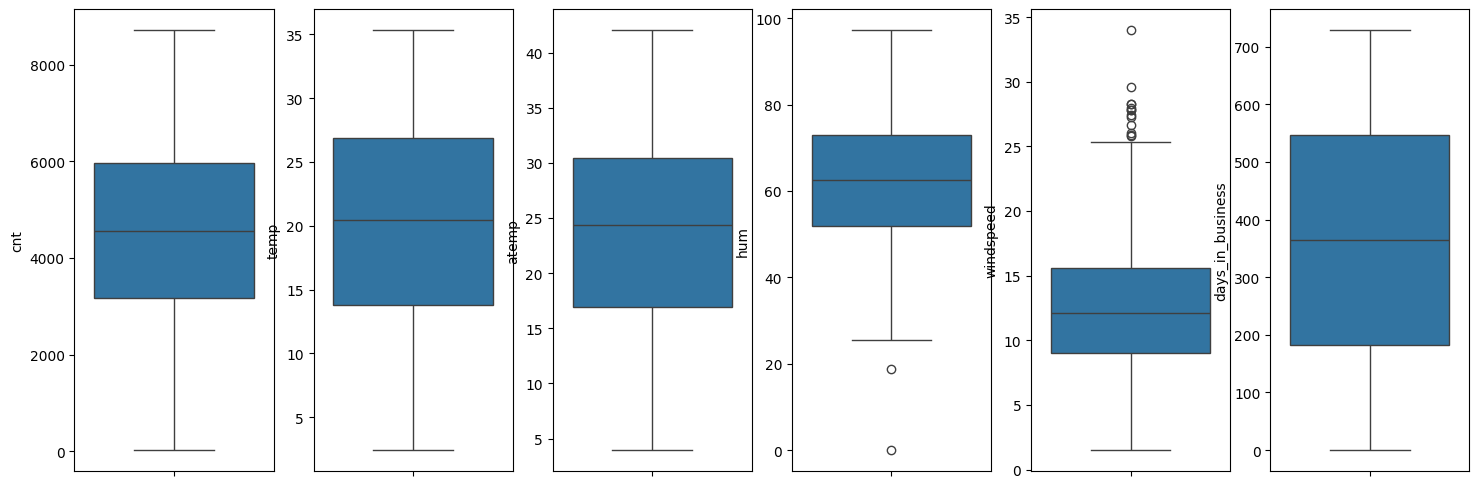

In [10]:
num_cols = ['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'days_in_business']
plt.figure(figsize = (18,len(num_cols)))
for index, num_col in enumerate(num_cols):
    plt.subplot(1,len(num_cols),index+1)
    sns.boxplot(y=num_col, data=bike_df)

#### 2.5. Add readable value labels to Categorical variables

In [11]:
bike_df.season.replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace = True)
bike_df.weathersit.replace({1: 'Clear', 2: 'Misty', 3: 'LightRain', 4: 'HeavyRain'}, inplace = True)
bike_df.weekday.replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}, inplace = True)
bike_df.mnth.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'Jun', 7: 'Jul', 
                      8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace = True)

In [12]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_in_business
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


<a id='EDA'/></a>
# 3. Exploratory Data Analysis
<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

In [13]:
# Common functions:
def generate_single_column_plots(col, label, figsize=(10, 5)):
    fig, p = plt.subplots(1,2, figsize=figsize)
    sns.boxplot(x=col, data=bike_df, ax=p[0])
    sns.distplot(bike_df.loc[bike_df[col].notnull(), col], kde=True, hist=True, ax=p[1])
    p[0].set_xlabel(label)
    p[1].set_xlabel(label)
    plt.tight_layout()
    plt.show()
    
def generate_count_plot(col, label, title, reverse=False, figsize=(10,5), print_stats=False, df=bike_df):
    if print_stats:
        print(str(df[col].value_counts()*100/df[col].count()))
    plt.figure(figsize=figsize)
    if reverse:
        plt.ylabel(label)
        sns.countplot(y=df[col])
    else:
        plt.xlabel(label)
        sns.countplot(x=df[col])
    plt.title(title)
    plt.show()

def segmented_univariate_analysis(cat_col_name, cat_col_label):
    # Group by the categorical column and calculate the mean of 'cnt'
    grouped_df = bike_df.groupby(cat_col_name)['cnt'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(5, 3))
    sns.barplot(x=cat_col_name, y='cnt', data=grouped_df)
    plt.title(f'Segmented Univariate Analysis based on {cat_col_label}')
    plt.xlabel(cat_col_label)
    plt.ylabel('Average Count (cnt)')
    plt.xticks(rotation=45)
    plt.show()

def plot_categorical_vs_categorical(cat_column1, cat_column2):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_column1, hue=cat_column2, data=bike_df)
    plt.title(f'Count of {cat_column1} vs {cat_column2}')
    plt.xlabel(cat_column1)
    plt.ylabel('Count')
    plt.legend(title=cat_column2)
    plt.xticks(rotation=45)
    plt.show()

### 3.1. Univariate Analysis - Numerical columns Visualization
num_cols = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']

__Inference:__
- Count is fairly normally distributed
- Temperature is mostly distributed between 15 and 30
- Feeling Temperature is mostly distributed between 17 and 40
- Humidity is mostly distributed between 40 and 80
- Windspeed is mostly distributed between 10 and 15

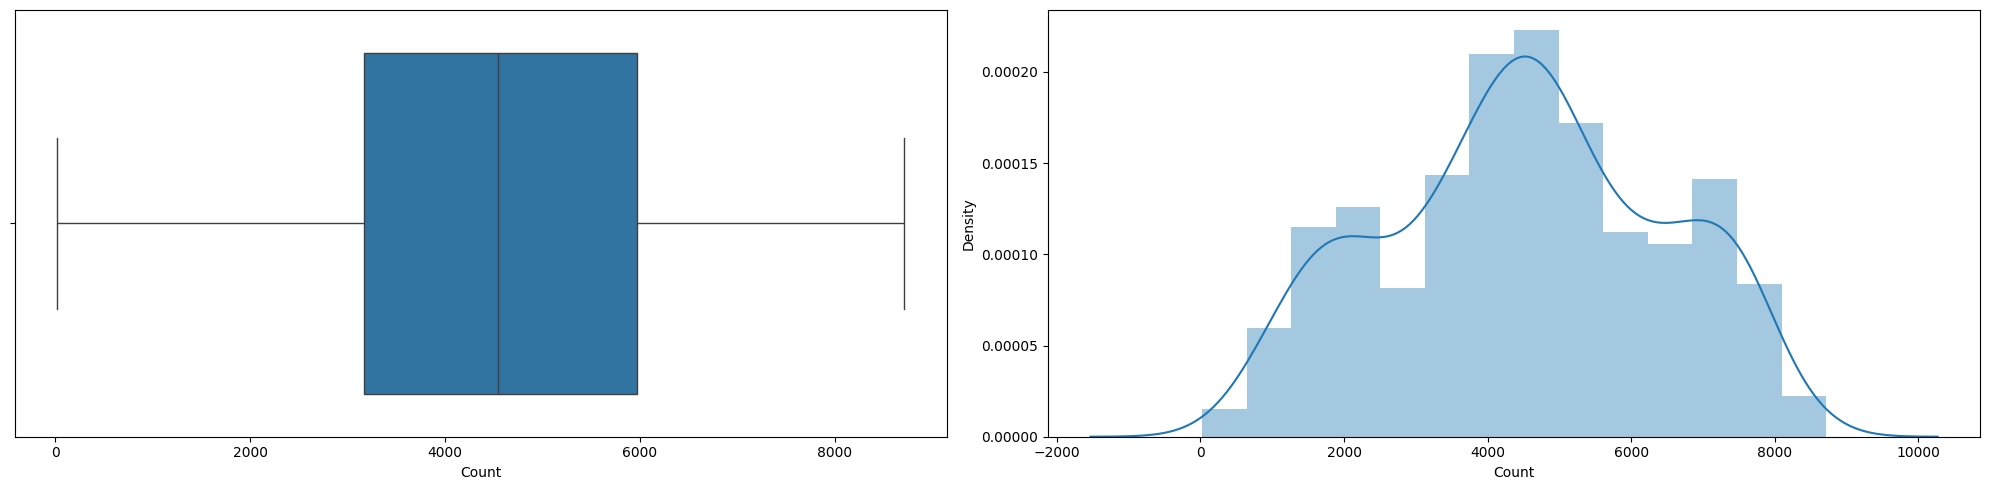

In [14]:
generate_single_column_plots("cnt", "Count", figsize=(20,5))

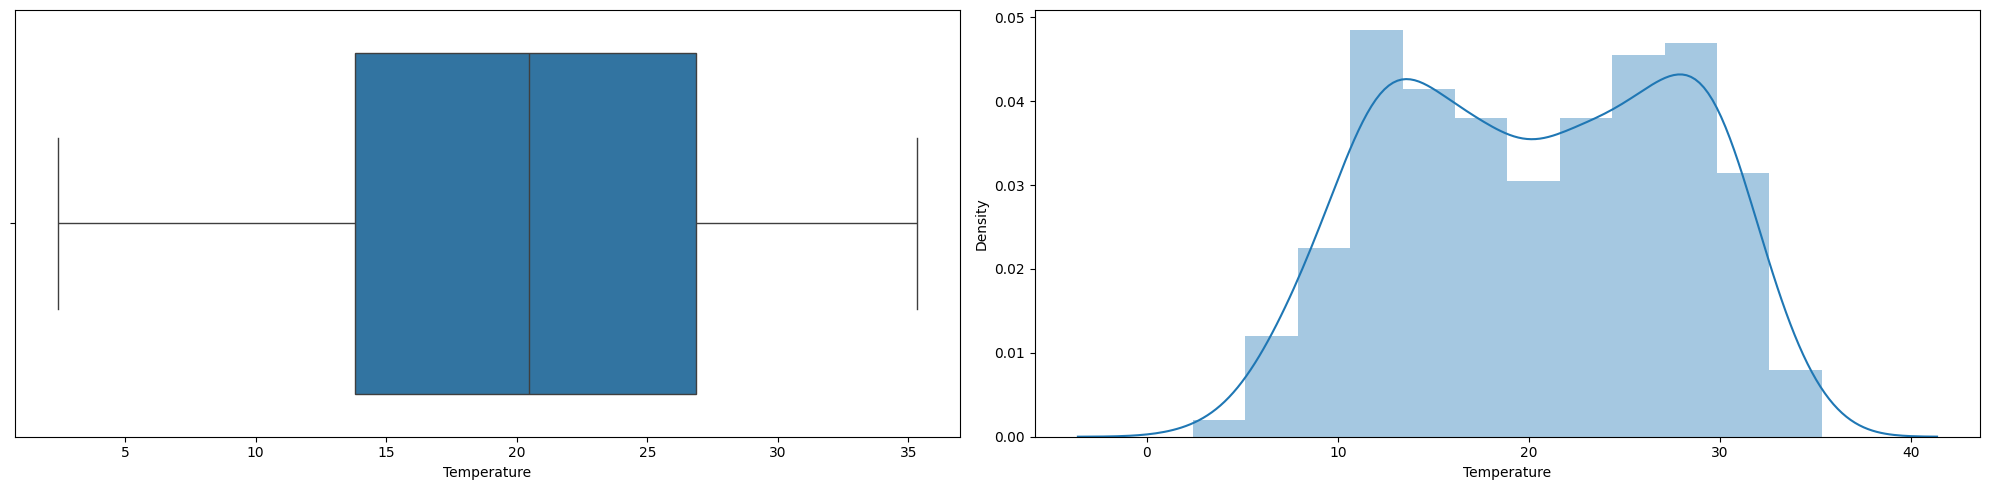

In [15]:
generate_single_column_plots("temp", "Temperature", figsize=(20,5))

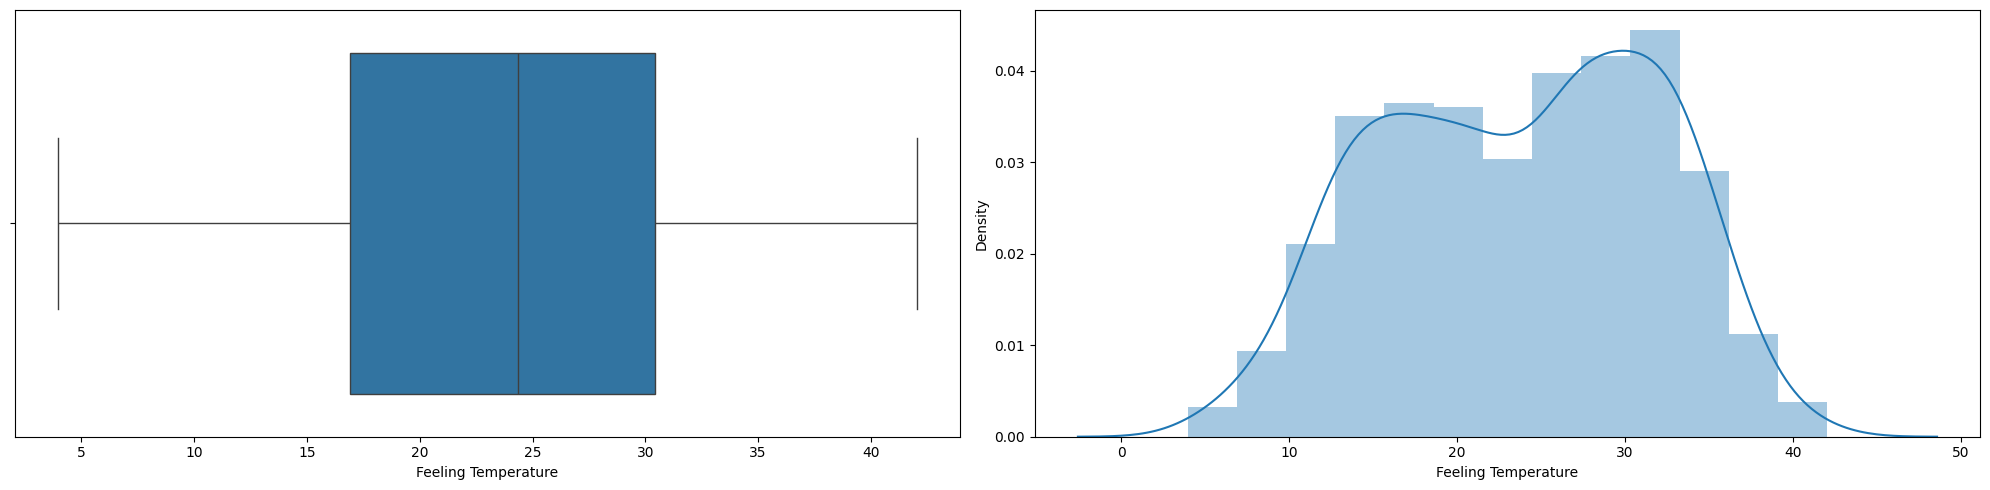

In [16]:
generate_single_column_plots("atemp", "Feeling Temperature", figsize=(20,5))

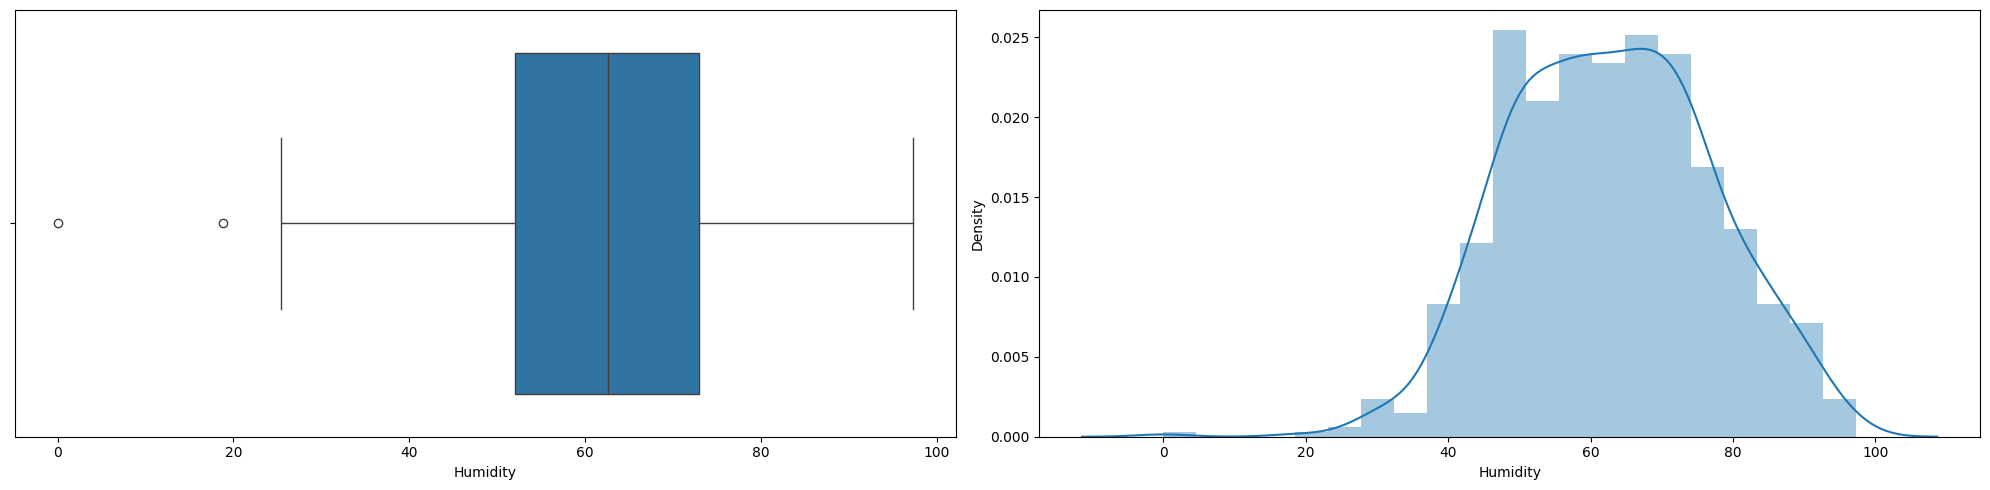

In [17]:
generate_single_column_plots("hum", "Humidity", figsize=(20,5))

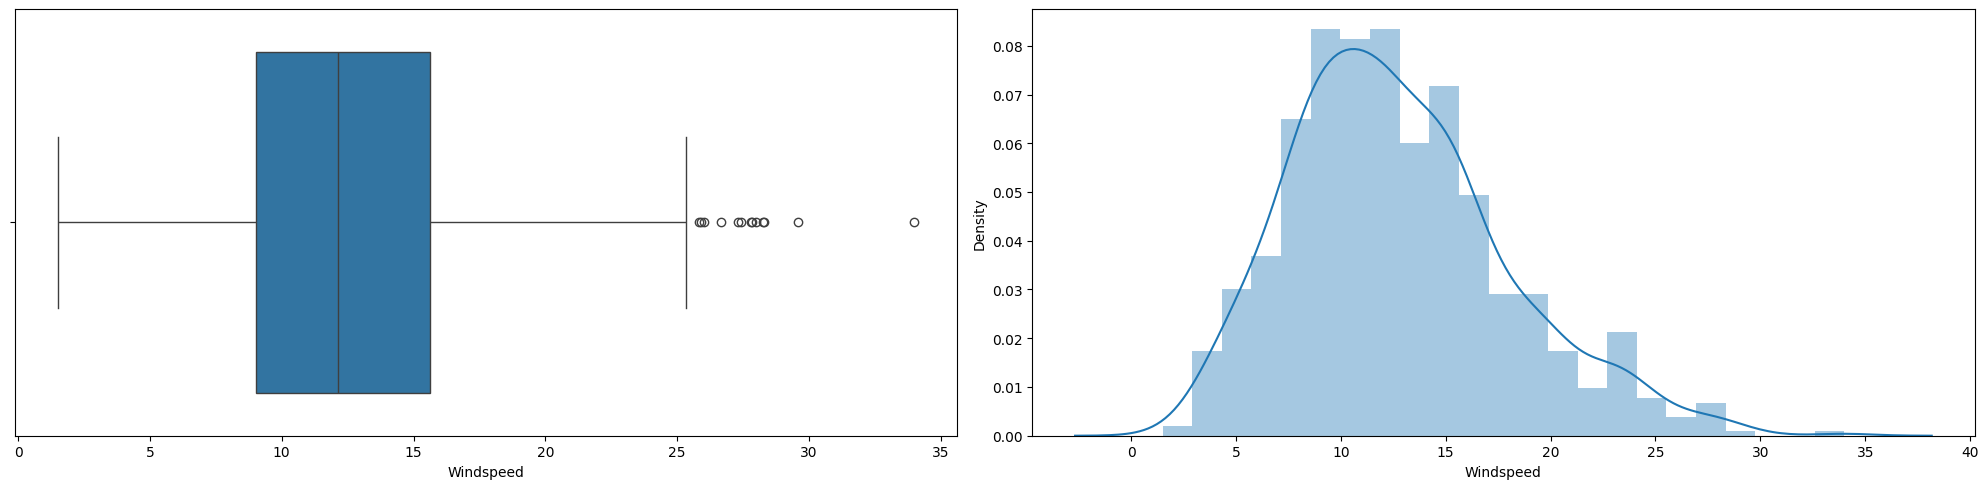

In [18]:
generate_single_column_plots("windspeed", "Windspeed", figsize=(20,5))

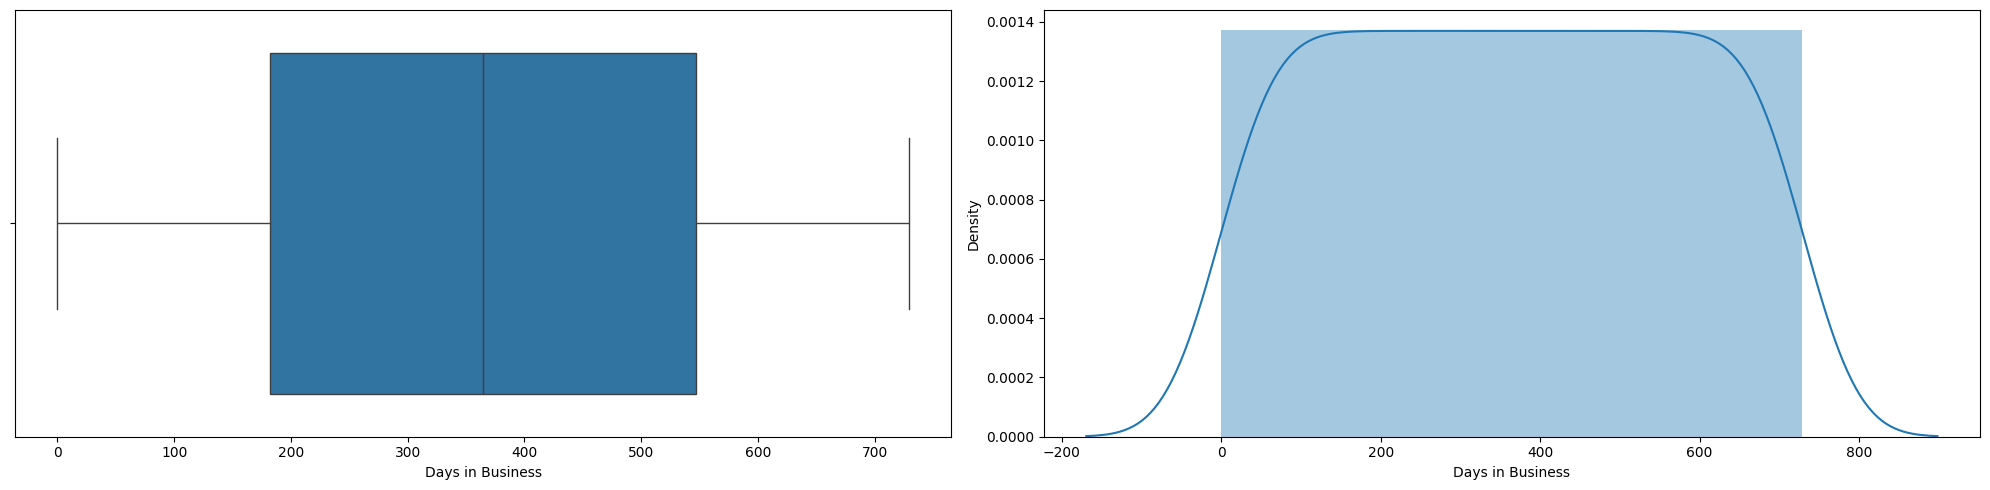

In [19]:
generate_single_column_plots("days_in_business", "Days in Business", figsize=(20,5))

### 3.2. Univariate Analysis - Categorical columns Visualization
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

__Inference:__
- Season: Data set is evenly distributed across season
- Year: evenly distributed across both years
- Month: evenly distributed across all the months of a year
- holiday: 97% data is for non holiday days 
- weekday: evenly distributed across all the days of a week
- Working Day: 68% data is for workingday
- weathersit: 63% data is for clear weather

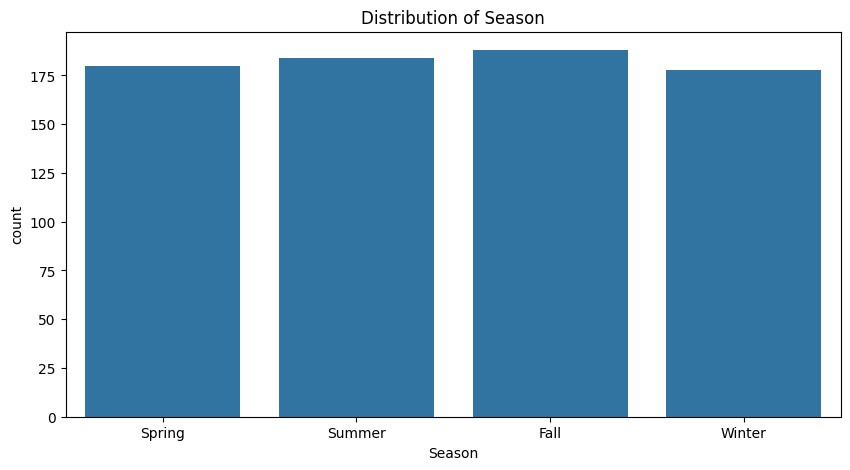

In [20]:
generate_count_plot('season', 'Season', 'Distribution of Season')

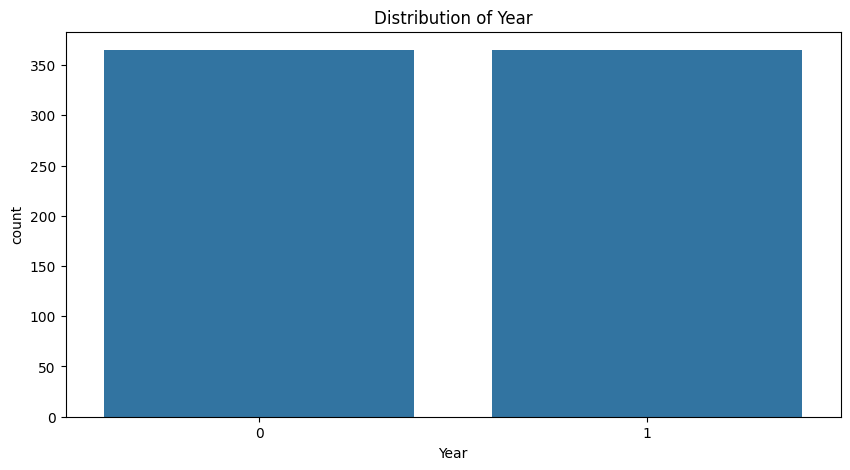

In [21]:
generate_count_plot('yr', 'Year', 'Distribution of Year')

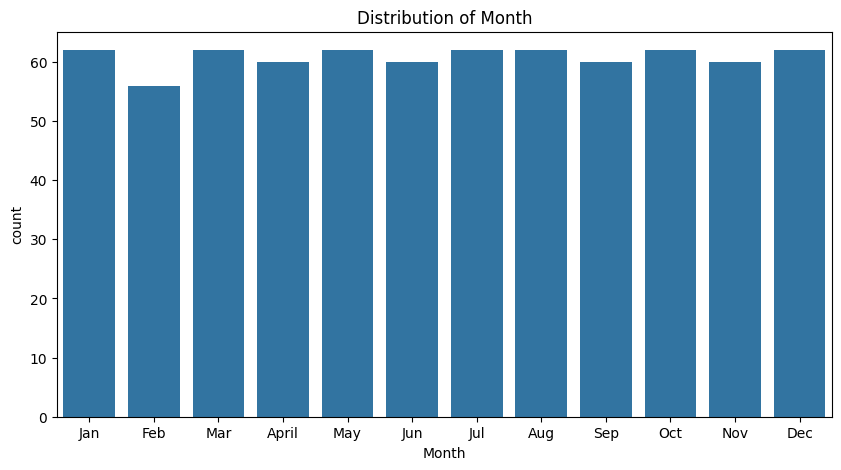

In [22]:
generate_count_plot('mnth', 'Month', 'Distribution of Month', )

holiday
0    97.123288
1     2.876712
Name: count, dtype: float64


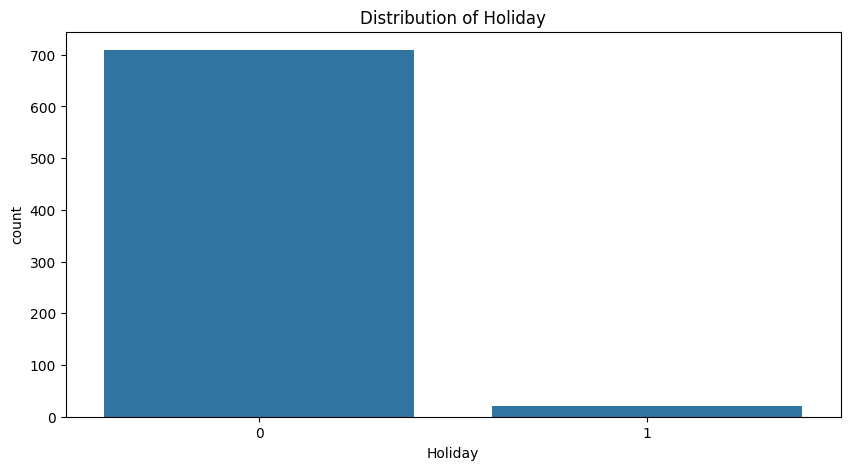

In [23]:
generate_count_plot('holiday', 'Holiday', 'Distribution of Holiday', print_stats=True)

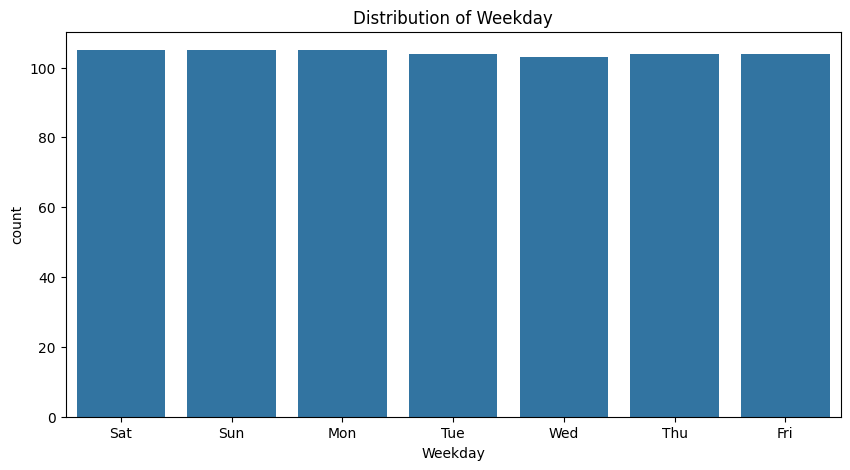

In [24]:
generate_count_plot('weekday', 'Weekday', 'Distribution of Weekday', )

workingday
1    68.356164
0    31.643836
Name: count, dtype: float64


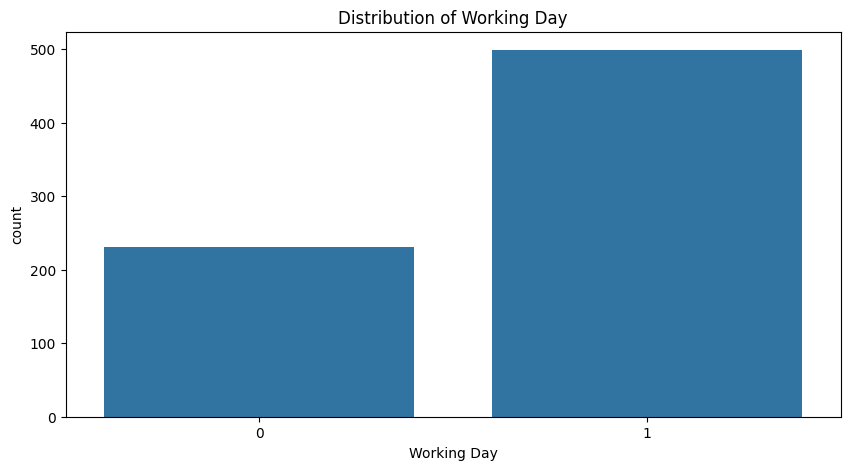

In [25]:
generate_count_plot('workingday', 'Working Day', 'Distribution of Working Day', print_stats=True)

weathersit
Clear        63.424658
Misty        33.698630
LightRain     2.876712
Name: count, dtype: float64


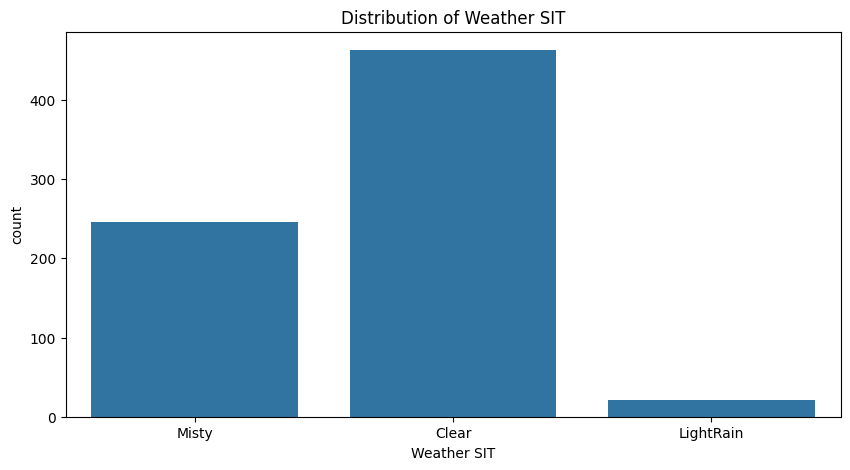

In [26]:
generate_count_plot('weathersit', 'Weather SIT', 'Distribution of Weather SIT', print_stats=True)

### 3.2. Segmented Univariate Analysis - Categorical columns Visualization
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

__Inference:__
- Season: Ridership / demand is less in Sprint compared to other seasons
- Month: Jun, Jul, Aug, Sep have higer demand compared to other months
- Weekday: Demand is almost similar across all days of the week
- Weather Situation: Naturally as we can expect, clear weather days have high demand
- Holiday: Holidays leads to drop in demand (atleast from median)
- Working Day: Median is almost same for whether it is a working day. 
- Year: Year 2019 has seen a sharp rise in demand. 

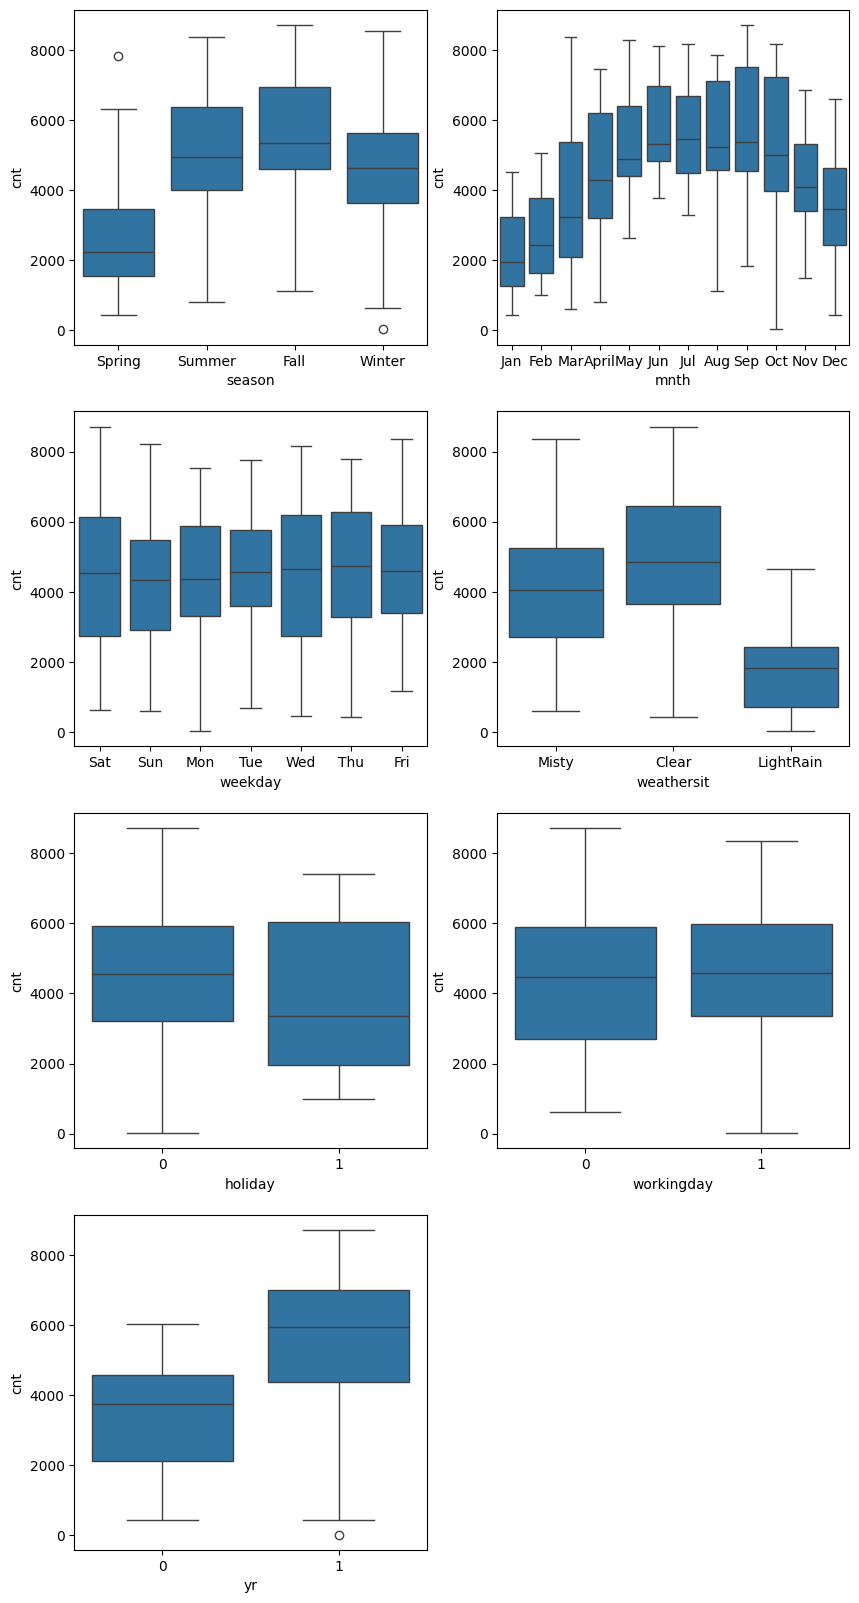

In [27]:

plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

In [28]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for c in cat_cols:
    bike_df[c] = bike_df[c].astype('category')
    

### 3.4. Bivariate Analysis - Numerical vs Numerical
__Inference:__
- Temp and atemp have a linear relationship with count
- Temp and atemp are highly co-related with each other, potentially one of them can be dropped

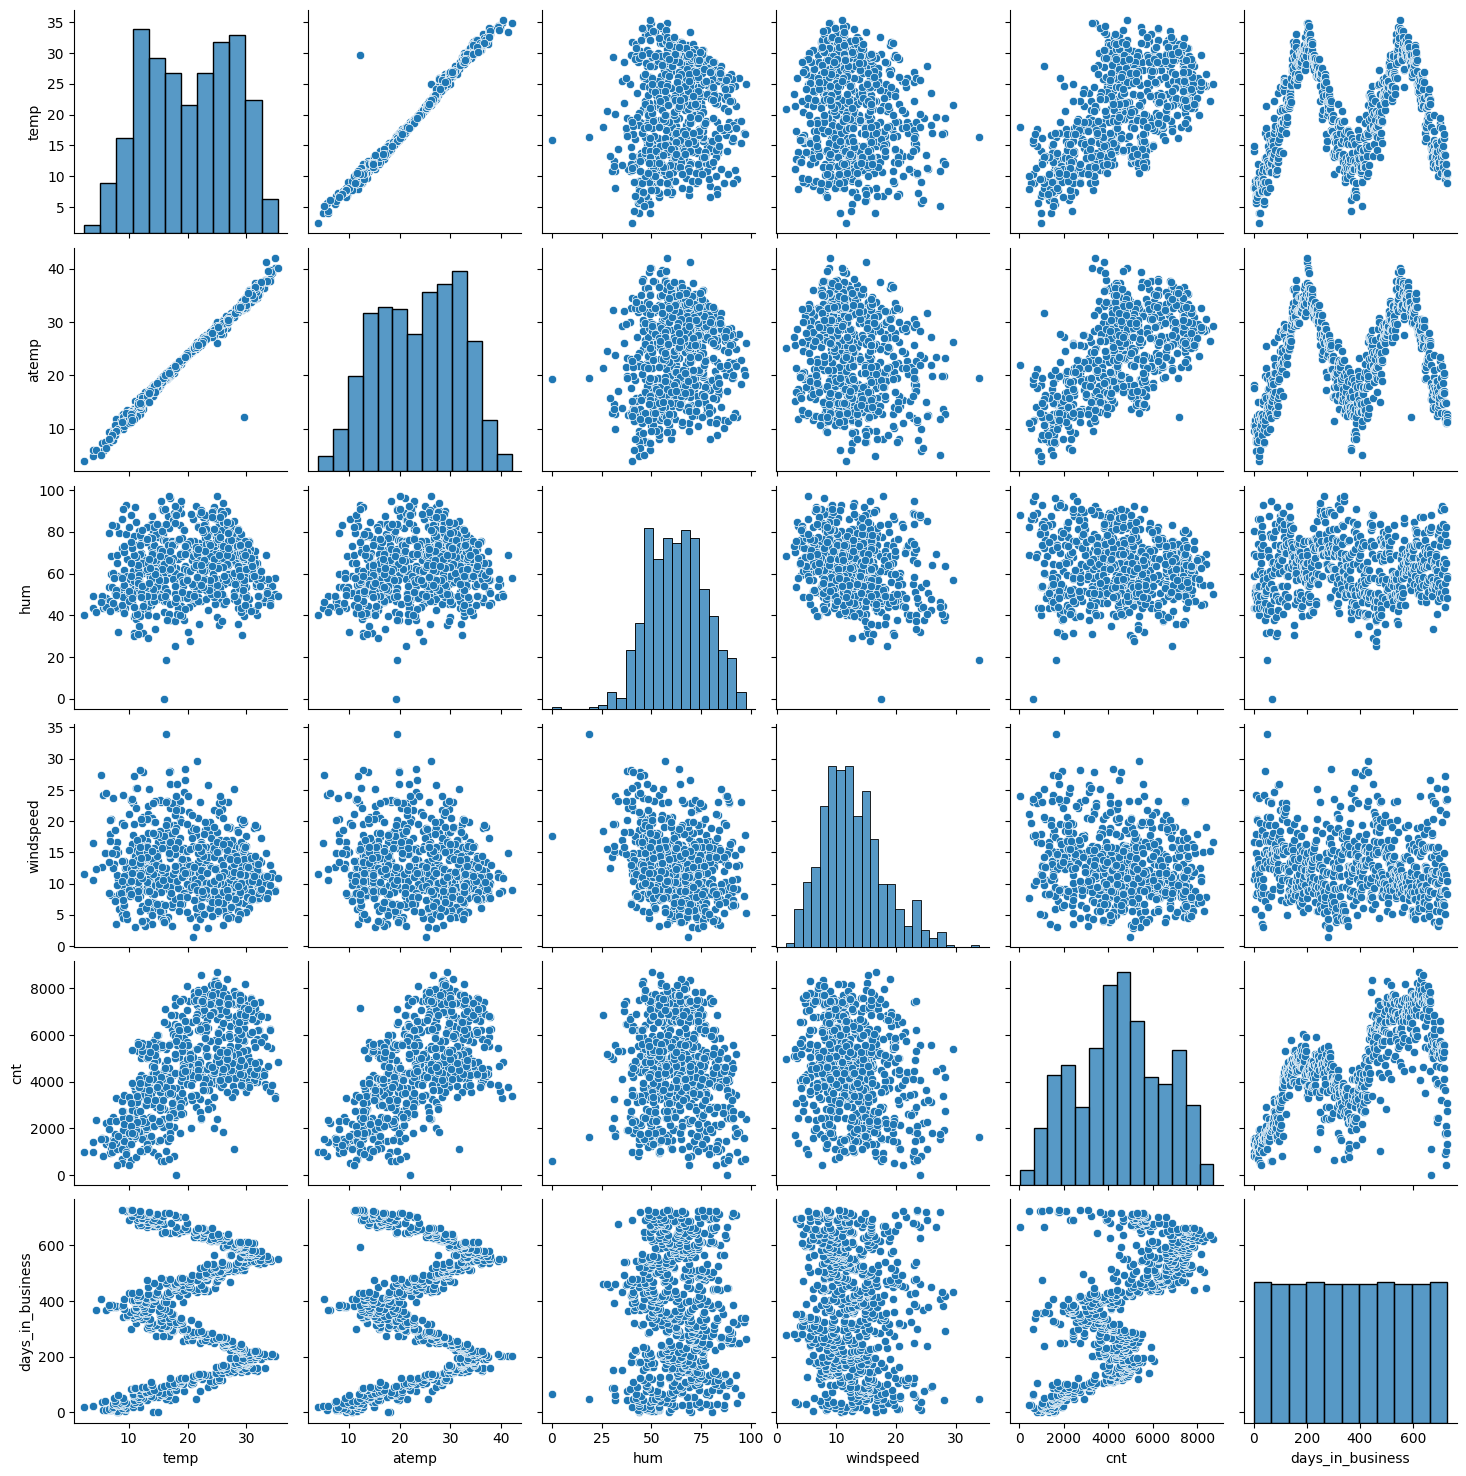

In [29]:
sns.pairplot(bike_df)
plt.show()

### 3.4. Bivariate Analysis - Categorical vs Categorical
__Inference:__
- Sprint season seems to have slightly more number of holidays

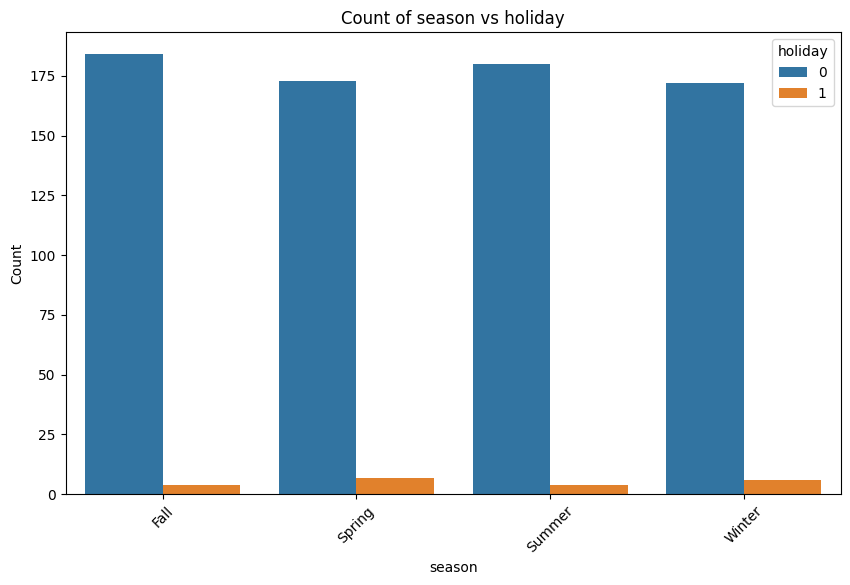

In [30]:
plot_categorical_vs_categorical('season', 'holiday')

### 3.5. Multivariate Analysis - HeatMap
__Inference:__
- Temp and atemp have high corelation, so one of these should be dropped.
- as already established, year 2019 has higher demand which is evident from days in business as well.
- since year and days in business have high corelation, we can drop one of them. 

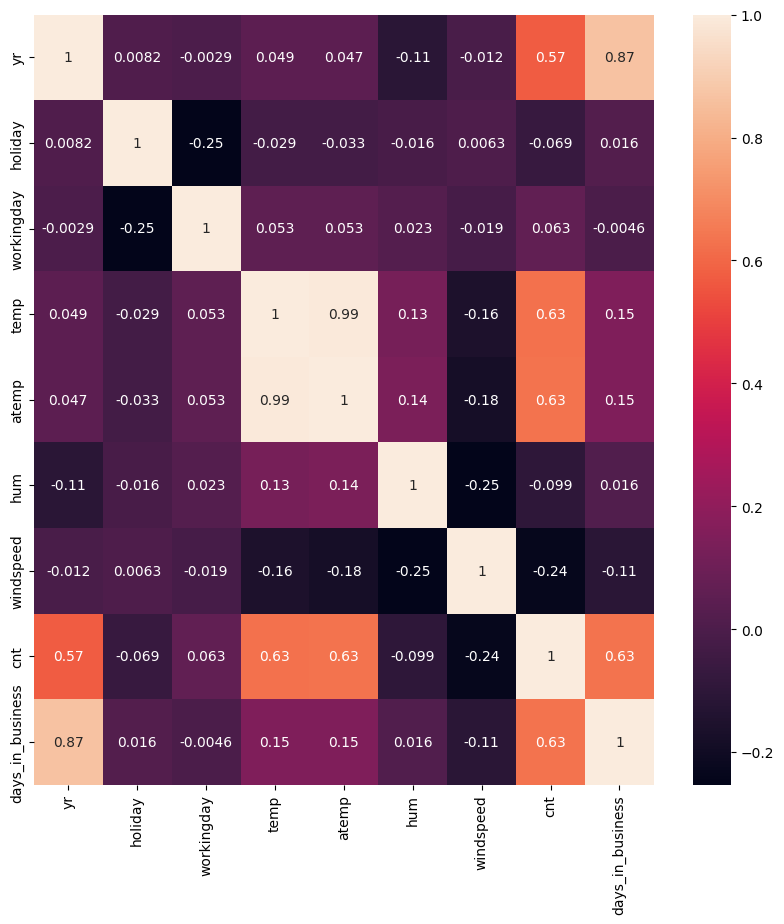

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(bike_df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt', 'days_in_business']].corr(),annot=True)
plt.show()

In [32]:
# Drop atemp as it is highly correlated with temp
bike_df.drop('atemp', axis=1, inplace=True)
# Drop days in business as it is highly correlated with yr
bike_df.drop('days_in_business', axis=1, inplace=True) 

<a id='data_encoding'></a>
# 4. Data Encoding
<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

### 4.1. Dummy encoding of categorical variables with more than 2 categories
- create n-1 dummy variables for season, mnth, weekday, weathersit
- since weathersit does not have any data for the last possible value "heavy rain" in the data set provided, either of the following approaches is possible. __We will go with option 2.__
    - option 1: factor this while creating dummy variable (still have 3 varibales)
    - option 2: assume this value will never come since we dont have it in the historical data and create only 2 variables.
    


In [33]:
dummies = pd.get_dummies(bike_df[['season','mnth','weekday', 'weathersit']], drop_first=True, dtype=int)
bike_df = pd.concat([bike_df, dummies], axis = 1)
bike_df = bike_df.drop(['season','mnth','weekday', 'weathersit'], axis=1)
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


<a id='Train-Test'></a>
# 5. Train-Test split
- For this assesment, we will use a 70-30 split for Train and Test

<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

In [34]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   yr                    730 non-null    category
 1   holiday               730 non-null    category
 2   workingday            730 non-null    category
 3   temp                  730 non-null    float64 
 4   hum                   730 non-null    float64 
 5   windspeed             730 non-null    float64 
 6   cnt                   730 non-null    int64   
 7   season_Spring         730 non-null    int64   
 8   season_Summer         730 non-null    int64   
 9   season_Winter         730 non-null    int64   
 10  mnth_Aug              730 non-null    int64   
 11  mnth_Dec              730 non-null    int64   
 12  mnth_Feb              730 non-null    int64   
 13  mnth_Jan              730 non-null    int64   
 14  mnth_Jul              730 non-null    int64   
 15  mnth_J

In [35]:
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 42)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


<a id='scaling'></a>
# 6. Rescaling features
- Continuous variables need to be scaled for better interpretability.
- However the target variable may or may not be scaled. Since interpretability is important for us in the exercise, we will avoid scaling the target variable 'cnt'
<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

In [36]:
# Let us scale continuous variables
num_vars = ['temp', 'hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
683,1,0,1,0.327133,0.639330,0.327101,5445,0,0,1,...,0,0,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,5478,0,0,1,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,5020,0,1,0,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.785745,0.415925,1162,1,0,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,7572,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [37]:
df_train[num_vars].describe()

,temp,hum,windspeed
count,510.000000,510.000000,510.000000
mean,0.551091,0.653801,0.414566
std,0.227401,0.143542,0.185671
min,0.000000,0.000000,0.000000
25%,0.354176,0.544033,0.281934
50%,0.575824,0.659296,0.383964
75%,0.745338,0.756762,0.525698
max,1.000000,1.000000,1.000000


<a id='modelling1'></a>
# 7. Modelling & Feature Selection - Automated Recursive Feature Elimination (RFE)
<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

### 7.1. Prepare X_train and y_train

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightRain,weathersit_Misty
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


### 7.2. Linear Regression model using automated RFE

In [40]:
# Build a Linear Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
# Run automated RFE with 15 as the number of features to be picked
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [42]:
# Features selected by automated RFE for top 15 features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 9),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 12),
 ('mnth_Jan', False, 14),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 3),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', False, 2),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('weathersit_LightRain', True, 1),
 ('weathersit_Misty', True, 1)]

### 7.3. Top 15 features selected by automation

In [43]:
features_selected = X_train.columns[rfe.support_].to_list()
features_selected

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'mnth_Dec',
 'mnth_Jul',
 'mnth_Nov',
 'weekday_Sat',
 'weekday_Sun',
 'weathersit_LightRain',
 'weathersit_Misty']

<a id='modelling2'></a>
# 8. Modelling & Feature Selection - Manual Feature Eliminiation
<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

In [44]:
# Common Functions

# Build a LR model using stats models by accepting the list of features
def build_lr_model_using_stats(features):
    # Adding constant
    X_train_sm = sm.add_constant(X_train[features])
    lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    return lm

# calculate Variance Inflation Factor (VIF)
def calculate_vif(cols):
    selected_feat_df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = selected_feat_df.columns
    vif['VIF'] = [variance_inflation_factor(selected_feat_df.values.astype(float), i) for i in range(selected_feat_df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    return vif.sort_values(by='VIF',ascending=False)

## Manual Feature Elimination guidelines
- High p-value, high VIF - __DROP FEATURE__
- Low p-value, low VIF - __KEEP FEATURE__
- High Low cases - To be assessed with iterations
    - High p-value, low VIF - __class A__
    - Low p-value, high VIF - __class B__
- Strategy 
    - drop __class A__ feature and check if VIF decreases for __class B__
    - drop only 1 feature at a time



### 8.1. BikeDemandModel v1

In [45]:
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          8.29e-185
Time:                        09:30:52   Log-Likelihood:                -4120.4
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2455.1162 

In [46]:
calculate_vif(features_selected)

,Features,VIF
2,workingday,49.94
12,weekday_Sun,12.23
11,weekday_Sat,11.85
3,temp,3.53
1,holiday,3.03
6,season_Spring,2.88
7,season_Winter,2.20
4,hum,1.85
10,mnth_Nov,1.71
14,weathersit_Misty,1.56


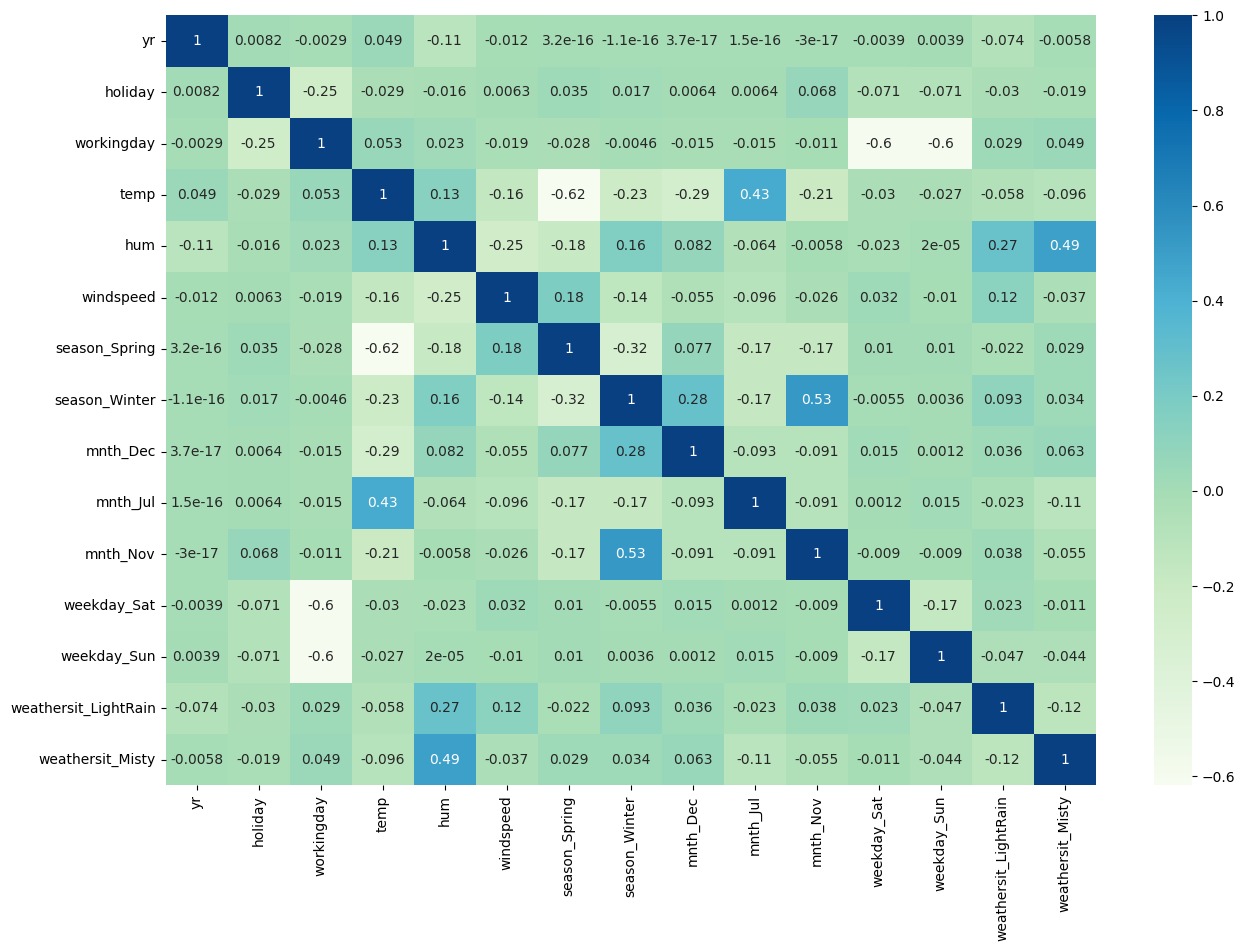

In [47]:
plt.figure(figsize = (15,10))
sns.heatmap(bike_df[features_selected].corr(), cmap='GnBu', annot=True)
plt.show()

__Inference__: Holiday has a high p-value and thus can be dropped.

### 8.2. BikeDemandModel v2
- Drop holiday which has a high p-value

In [48]:
features_selected.remove('holiday')
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     181.9
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          8.29e-185
Time:                        09:31:15   Log-Likelihood:                -4120.4
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2628.9939 

In [49]:
calculate_vif(features_selected)

,Features,VIF
3,hum,28.89
2,temp,19.62
1,workingday,17.39
4,windspeed,5.90
11,weekday_Sun,4.74
10,weekday_Sat,4.63
5,season_Spring,2.92
6,season_Winter,2.80
13,weathersit_Misty,2.25
0,yr,2.10


__Inference__: weekday_Sun has a high p-value and thus can be dropped.

### 8.3. BikeDemandModel v3
- Drop weekday_Sun which has a high p-value

In [50]:
features_selected.remove('weekday_Sun')
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.2
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          1.84e-185
Time:                        09:31:33   Log-Likelihood:                -4121.6
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     496   BIC:                             8331.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2928.9464 

In [51]:
calculate_vif(features_selected)

,Features,VIF
3,hum,24.38
2,temp,17.97
4,windspeed,5.14
1,workingday,4.54
6,season_Winter,2.74
5,season_Spring,2.69
12,weathersit_Misty,2.21
0,yr,2.09
9,mnth_Nov,1.82
10,weekday_Sat,1.78


__Inference__: 
- All the variables have p-value < 0.05, thus all variables seem to be significant. 
- Next aspect to look at is the VIF, hum has a high VIF, lets drop this and create a new model

### 8.3. BikeDemandModel v3
- Drop hum which has a high VIF

In [52]:
features_selected.remove('hum')
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          7.43e-184
Time:                        09:31:49   Log-Likelihood:                -4128.2
No. Observations:                 510   AIC:                             8282.
Df Residuals:                     497   BIC:                             8337.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2221.6881 

In [53]:
calculate_vif(features_selected)

,Features,VIF
2,temp,7.25
3,windspeed,5.12
1,workingday,4.46
5,season_Winter,2.39
0,yr,2.09
4,season_Spring,1.84
8,mnth_Nov,1.78
9,weekday_Sat,1.75
11,weathersit_Misty,1.57
7,mnth_Jul,1.39


__Inference__:
- There is a sligh drop in Adjusted R2 value
- p-values are all good
- VID for temp is high and can be droppped

### 8.3. BikeDemandModel v4
- Drop temp which has a high VIF

In [54]:
features_selected.remove('temp')
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.81e-158
Time:                        09:32:34   Log-Likelihood:                -4191.6
No. Observations:                 510   AIC:                             8407.
Df Residuals:                     498   BIC:                             8458.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4641.1339 

In [55]:
calculate_vif(features_selected)

,Features,VIF
2,windspeed,3.91
1,workingday,3.09
4,season_Winter,2.39
0,yr,1.97
7,mnth_Nov,1.73
10,weathersit_Misty,1.55
3,season_Spring,1.54
8,weekday_Sat,1.52
5,mnth_Dec,1.30
6,mnth_Jul,1.16


__Inference__:
- There is a drop in Adjusted R2 value
- mnth_Jul has high p-values are should be dropped

### 8.3. BikeDemandModel v5
- Drop mnth_Jul which has a high p-value

In [56]:
features_selected.remove('mnth_Jul')
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     182.0
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          2.30e-159
Time:                        09:32:52   Log-Likelihood:                -4191.7
No. Observations:                 510   AIC:                             8405.
Df Residuals:                     499   BIC:                             8452.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4661.0657 

In [57]:
calculate_vif(features_selected)

,Features,VIF
2,windspeed,3.88
1,workingday,3.02
4,season_Winter,2.34
0,yr,1.94
6,mnth_Nov,1.73
9,weathersit_Misty,1.54
7,weekday_Sat,1.51
3,season_Spring,1.49
5,mnth_Dec,1.30
8,weathersit_LightRain,1.09


__Inference__:
- season_Winter has high p-value, so can be dropped

### 8.3. BikeDemandModel v6
- Drop season_Winter which has a high VIF

In [58]:
features_selected.remove('season_Winter')
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          7.67e-160
Time:                        09:33:07   Log-Likelihood:                -4193.3
No. Observations:                 510   AIC:                             8407.
Df Residuals:                     500   BIC:                             8449.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4722.4071 

In [59]:
calculate_vif(features_selected)

,Features,VIF
2,windspeed,3.87
1,workingday,2.96
0,yr,1.92
8,weathersit_Misty,1.52
6,weekday_Sat,1.50
3,season_Spring,1.37
5,mnth_Nov,1.12
4,mnth_Dec,1.11
7,weathersit_LightRain,1.09


__Inference__:
- p-values are all fine
- VIFs are all acceptable
- however, from business knowledge we can say that temperature could be of importance as users decide on whether to ride a bike or find some other mode of transport based on how the temp is, thus we can consider and add temp back and see how the parameters change

### 8.3. BikeDemandModel v7
- Add temp back

In [61]:
features_selected.append('temp')
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     219.5
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          1.51e-175
Time:                        09:35:05   Log-Likelihood:                -4153.5
No. Observations:                 510   AIC:                             8329.
Df Residuals:                     499   BIC:                             8376.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3022.9064 

In [62]:
calculate_vif(features_selected)

,Features,VIF
9,temp,6.06
2,windspeed,5.02
1,workingday,4.34
0,yr,2.07
6,weekday_Sat,1.73
3,season_Spring,1.71
8,weathersit_Misty,1.53
5,mnth_Nov,1.18
4,mnth_Dec,1.13
7,weathersit_LightRain,1.10


__Inference__:
- Adding temp back increased R2 
- However looking at the vif, it was not a good idea to add temp, lets remove it again

### 8.3. BikeDemandModel v8 - Final Model
- Remove temp again
<a id='final_model'></a>

In [64]:
features_selected.remove('temp')
model = build_lr_model_using_stats(features_selected)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 04 Jun 2024   Prob (F-statistic):          7.67e-160
Time:                        09:37:33   Log-Likelihood:                -4193.3
No. Observations:                 510   AIC:                             8407.
Df Residuals:                     500   BIC:                             8449.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4722.4071 

In [65]:
calculate_vif(features_selected)

,Features,VIF
2,windspeed,3.87
1,workingday,2.96
0,yr,1.92
8,weathersit_Misty,1.52
6,weekday_Sat,1.50
3,season_Spring,1.37
5,mnth_Nov,1.12
4,mnth_Dec,1.11
7,weathersit_LightRain,1.09


__Inference__:
- R2 squared is 0.783 which is decent indicating good fit.
- all p-values are within acceptable range (< 0.05)
- all VIFs are in acceptable range (<5)
- this feature list will be our final list of features.

<a id='model_eval'></a>
# 9. Model Evaluation
<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

In [66]:
lr_model = LinearRegression()
lr_model.fit(X_train[features_selected], y_train)
print(lr_model.intercept_, lr_model.coef_)

4722.407132910507 [ 2053.81562229   476.23488896 -1237.84246373 -2649.13515057
  -936.93099971 -1115.83361998   425.26932908 -2422.38368048
  -720.40927911]


### 9.1. Residual Analysis - Training Data

In [67]:
y_train_pred = lr_model.predict(X_train[features_selected])

### Residual plot is Normally distributed and centered around normal <a id='residuals_plot'></a>

<Axes: xlabel='cnt', ylabel='Density'>

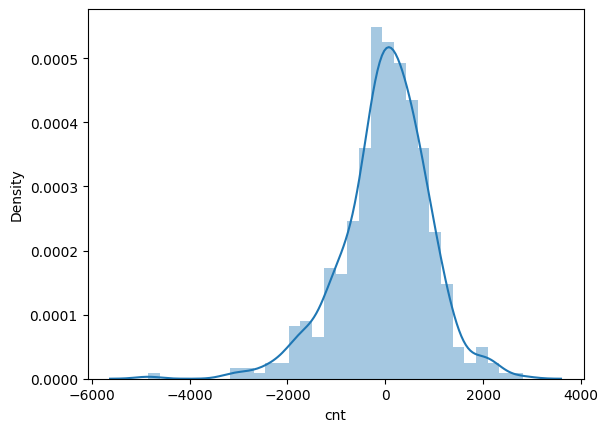

In [68]:
# Residual Plot
residual = y_train - y_train_pred
sns.distplot(residual)

### Residuals are homoscedastic <a id='residuals_plot_homoscedasticity'></a> 
- There is no patterns visible in the residuals which is indicative of a good model

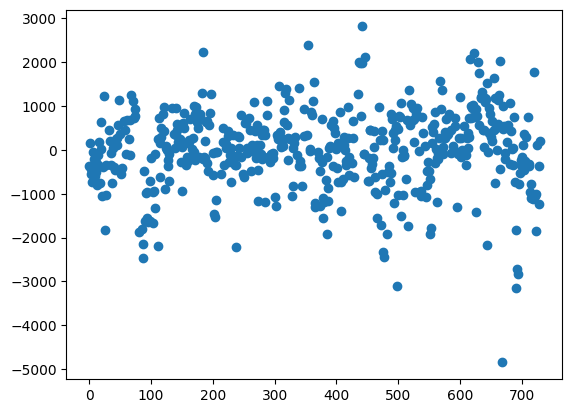

In [75]:
plt.scatter(X_train[features_selected].index, residual)
plt.show()

### 9.2. Predictions on the Test Set

In [77]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
y_test_pred = lr_model.predict(X_test[features_selected])

### 9.3. Evaluations on the Test Set
- Generate R2 score
- Evaluate spread by plotting y_test and y_pred

In [80]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7461304867335024

Text(0, 0.5, 'y_test_pred')

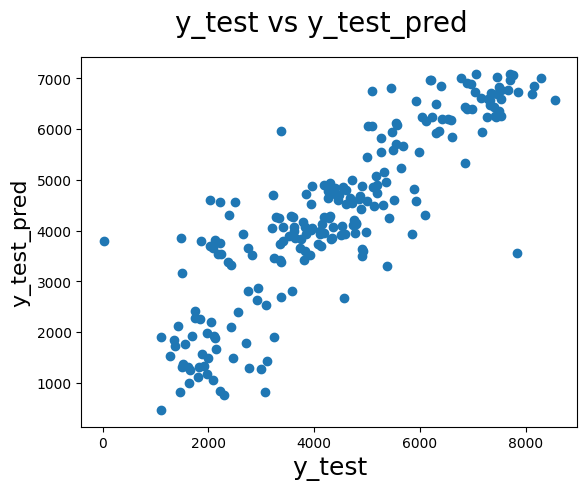

In [81]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Model seems to be doing good on test set as well.

### 9.4. Corelation between the features selected

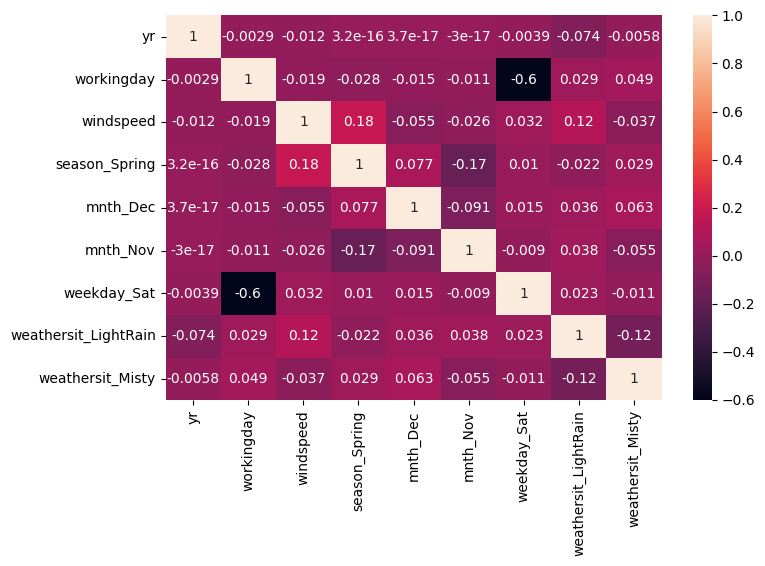

In [82]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike_df[features_selected].corr(), annot=True)
plt.show()

<a id='summary'></a>
# 10. Summary


<div style="text-align: right;">
    <a href="#top">Go back to top</a>
</div>

## Features selected
- yr
- workingday
- windspeed
- season_Spring
- mnth_Dec
- mnth_Nov
- weekday_Sat
- weathersit_LightRain
- weathersit_Misty

## R2 score for the model is 0.746 which is pretty good and close to the train set R2 score

In [83]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7461304867335024

## Intercept and Co-efficients

In [84]:
print(f'Intercept - {lr_model.intercept_}')

Intercept - 4722.407132910507


In [92]:
print(f'Coefficients - {lr_model.coef_}')

Coefficients - [ 2053.81562229   476.23488896 -1237.84246373 -2649.13515057
  -936.93099971 -1115.83361998   425.26932908 -2422.38368048
  -720.40927911]


## Residuals are normally distrubted 
<a href="#residuals_plot">Residuals Plot</a>

## There is no visible pattern in distribution of residuals
<a href="#residuals_plot_homoscedasticity">Residuals Scatter Plot</a>


## Final list of features selected seem to have low co-relation with each other

In [ ]:
features_selected

## In conclusion, this model seems to be performing well. 